In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
import env
import acquire
import summarize
import pandas_profiling


    id  parcelid             logerror transactiondate   id  parcelid  \
0   20  12325145                 0.04      2017-01-02   20  11324547   
1   31  14338242                -0.02      2017-01-02   31  11544747   
2   33  12155445                -0.04      2017-01-02   33  11585547   
3  110  14724525                 0.04      2017-01-03  110  12716947   
4  111  14179809                -0.00      2017-01-03  111  12757147   

   airconditioningtypeid  architecturalstyletypeid         basementsqft  \
0                   1.00                       nan                  nan   
1                   1.00                       nan                  nan   
2                    nan                       nan                  nan   
3                    nan                       nan                  nan   
4                   1.00                       nan                  nan   

           bathroomcnt  ...  buildingclassdesc heatingorsystemtypeid  \
0                 2.00  ...               No

                        id             parcelid             logerror  \
count            55,720.00            55,720.00            55,720.00   
mean             38,694.38        12,992,829.29                 0.02   
std              22,359.55         3,173,834.47                 0.17   
min                  20.00        10,711,855.00                -4.66   
25%              19,482.75        11,538,718.50                -0.02   
50%              38,819.50        12,527,437.50                 0.01   
75%              57,160.25        14,211,470.50                 0.04   
max              77,613.00       167,689,317.00                 5.26   

                        id             parcelid  airconditioningtypeid  \
count            55,720.00            55,720.00              13,641.00   
mean             38,694.38        13,057,802.67                   2.36   
std              22,359.55         4,674,927.93                   3.74   
min                  20.00        10,711,745.00        

In [3]:
df = acquire.acquire_zillow()


Prevent 'head' from truncating the number of columns

In [4]:
pd.set_option('display.max_columns', None) 

In [5]:
# pandas_profiling.ProfileReport(df)

Remove duplicate columns

In [6]:
 df = df.loc[:,~df.columns.duplicated()] 

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [7]:
def new_df(df):
    num_rows_missing = df.isna().sum()
    pct_rows_missing = num_rows_missing/len(df)*100
    df_sum = pd.DataFrame()
    df_sum['num_rows_missing'] = num_rows_missing
    df_sum['pct_rows_missing'] = pct_rows_missing
    return df_sum

In [8]:
df_x = new_df(df)
df_x

,num_rows_missing,pct_rows_missing
id,0,0.00
parcelid,0,0.00
logerror,0,0.00
transactiondate,0,0.00
airconditioningtypeid,42079,75.52
architecturalstyletypeid,55659,99.89
basementsqft,55677,99.92
bathroomcnt,0,0.00
bedroomcnt,0,0.00
buildingclasstypeid,55720,100.00


In [9]:
def new_df(df):
    num_cols_missing = df.isna().sum()
    pct_cols_missing = num_cols_missing/len(df)*100
    num_rows_missing = df.isna().sum()
    df_sum = pd.DataFrame()
    df_sum['num_rows_missing'] = num_rows_missing
    df_sum['pct_rows_missing'] = pct_rows_missing
    return df_sum

Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [11]:
df.isnull().values.ravel().sum() #How many empty cells within the entire df

1837420

In [12]:
df.sort_values("transactiondate", ascending = True, inplace=True)
df.head()

,id,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,20,12325145,0.04,2017-01-02,1.00,nan,nan,2.00,4.00,None,8.00,2.00,nan,nan,"3,633.00","3,633.00",nan,None,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,560,018.00","-118,169,806.00","9,826.00",nan,nan,nan,nan,nan,0100,261.00,LCA22,"60,379,102.06","40,227.00","3,101.00",nan,"97,329.00",0.00,nan,nan,nan,1.00,nan,nan,"2,005.00",nan,nan,"222,321.00","296,425.00","2,016.00","74,104.00","6,941.39",None,nan,nan,Central,None,None,Central,Single Family Residential,None,None
1,31,14338242,-0.02,2017-01-02,1.00,nan,nan,4.00,3.00,None,11.00,4.00,nan,nan,"1,620.00","1,620.00",nan,None,nan,nan,"6,037.00",nan,4.00,nan,nan,nan,2.00,"33,996,200.00","-118,438,000.00",nan,nan,nan,nan,nan,nan,0100,261.00,LAR3,"60,372,722.02","12,447.00","3,101.00","116,415.00","96,047.00",0.00,nan,nan,nan,1.00,nan,nan,"2,011.00",nan,nan,"339,532.00","847,770.00","2,016.00","508,238.00","10,244.94",None,nan,nan,Central,None,None,Central,Single Family Residential,None,None
2,33,12155445,-0.04,2017-01-02,nan,nan,nan,2.00,3.00,None,8.00,2.00,nan,nan,"2,077.00","2,077.00",nan,None,nan,nan,"6,037.00",nan,2.00,nan,nan,nan,2.00,"34,012,977.00","-118,479,243.00","6,490.00",nan,nan,nan,nan,nan,0100,261.00,SMR2*,"60,377,022.01","26,964.00","3,101.00",nan,"96,152.00",0.00,nan,nan,nan,1.00,nan,nan,"1,926.00",nan,nan,"210,192.00","646,760.00","2,016.00","436,568.00","7,924.68",None,nan,nan,None,None,None,Central,Single Family Residential,None,None
65,373,11744823,0.08,2017-01-03,nan,nan,nan,2.00,3.00,None,nan,2.00,nan,"1,456.00","1,456.00","1,456.00",nan,None,"1,456.00",nan,"6,111.00",1.00,2.00,3.00,780.00,nan,nan,"34,378,340.00","-118,936,013.00","11,000.00",nan,nan,nan,nan,nan,1110,261.00,None,"61,110,003.03","18,098.00","2,061.00",nan,"97,094.00",5.00,nan,nan,nan,nan,324.00,nan,"1,964.00",1.00,nan,"119,084.00","178,107.00","2,016.00","59,023.00","1,998.80",None,nan,"61,110,003,033,043.00",None,None,None,None,Single Family Residential,None,None
64,372,12439387,-0.02,2017-01-03,nan,nan,nan,2.00,3.00,None,nan,2.00,66.00,"2,266.00","2,266.00","2,266.00",nan,None,"2,266.00",nan,"6,111.00",2.00,2.00,5.00,"1,258.00",nan,nan,"34,371,870.00","-119,056,755.00","24,402.00",nan,nan,nan,nan,nan,1110,261.00,None,"61,110,004.00","26,965.00","2,061.00",nan,"97,113.00",6.00,nan,nan,nan,nan,nan,nan,"1,987.00",1.00,nan,"357,372.00","675,590.00","2,016.00","318,218.00","7,629.16",None,nan,"61,110,004,003,003.00",None,None,None,None,Single Family Residential,None,None


Verify that parcelid indicates multiple sales within 2017

In [13]:
df.parcelid.value_counts().sort_values()

12496799    1
13940649    1
10803109    1
12771236    1
11320129    1
14749598    1
11214748    1
14231451    1
11751318    1
12017556    1
13072273    1
10848143    1
11116428    1
12562314    1
17282953    1
11519879    1
12177286    1
14671748    1
13961346    1
17180603    1
12381363    1
12844928    1
11659203    1
12335097    1
11995353    1
11290615    1
13932461    1
14702517    1
11568751    1
11701870    1
           ..
12402398    2
11743374    2
11711539    2
13067305    2
11391577    2
10779619    2
14008322    2
14236060    2
14097534    2
10858360    2
10984080    2
11999890    2
11496770    2
11627049    2
13066981    2
14455319    2
11501340    2
11446756    2
12048224    2
10976131    2
12847318    2
10852812    2
12612211    2
14092694    2
10753427    2
12575721    2
11917650    2
10879060    2
17136356    2
10857130    3
Name: parcelid, Length: 55602, dtype: int64

Remove all except the last sale (row) when a property has been bought and sold multiple times during the year.

In [14]:
df.drop_duplicates('parcelid', keep='last',inplace=True) 
df.describe() #number has dropped the expected amount, 200 rows

,id,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,"55,602.00","55,602.00","55,602.00","13,614.00",61.00,42.00,"55,602.00","55,602.00","36,867.00","55,582.00",351.00,"4,720.00","55,597.00","55,393.00",18.00,"4,720.00",186.00,"55,602.00","7,598.00","55,582.00","18,218.00","18,218.00","1,239.00","36,954.00","55,602.00","55,602.00","55,302.00","10,911.00",764.00,411.00,828.00,"10,071.00","55,602.00","55,602.00","54,597.00","55,602.00","20,600.00","55,538.00","55,602.00",42.00,"6,002.00",69.00,"36,924.00","2,107.00",62.00,"55,573.00","15,434.00",68.00,"55,537.00","55,600.00","55,602.00","55,600.00","55,530.00","1,111.00","55,339.00"
mean,"38,727.96","12,993,421.31",0.02,2.36,7.41,600.10,2.25,3.31,6.17,2.25,66.00,"1,489.32","1,869.66","1,871.64","1,404.00","1,503.73","1,325.82","6,048.81",1.18,2.20,1.92,487.17,1.00,4.08,"34,016,059.33","-118,206,451.84","11,075.05",1.00,521.52,1.00,1.00,1.00,261.01,"60,491,170.30","35,489.49","2,558.93","180,583.10","96,599.74",1.89,7.00,1.01,6.00,1.00,338.57,248.48,"1,961.22",1.38,1.00,"178,325.00","456,491.54","2,016.00","278,368.60","5,564.53",13.94,"60,490,976,194,907.54"
std,"22,358.59","3,176,264.50",0.17,3.74,2.61,473.76,0.99,0.92,1.70,0.99,0.00,628.56,963.99,963.96,142.83,683.80,848.28,21.19,0.49,0.97,0.57,162.74,0.00,2.55,"248,795.31","352,446.79","84,526.84",0.00,162.21,0.00,0.00,0.00,0.31,"210,351.65","54,138.79",788.17,"162,336.44","4,473.79",3.16,0.00,0.13,0.00,0.04,257.22,271.64,21.98,0.53,0.00,"228,806.25","593,597.81",0.04,"418,201.82","6,826.59",1.54,"210,350,551,381.51"
min,20.00,"10,711,855.00",-4.66,1.00,2.00,63.00,1.00,1.00,1.00,1.00,66.00,316.00,320.00,320.00,"1,056.00",316.00,368.00,"6,037.00",1.00,1.00,0.00,0.00,1.00,1.00,"33,340,711.00","-119,448,392.00",500.00,1.00,28.00,1.00,1.00,1.00,261.00,"60,371,011.10","3,491.00","1,286.00","6,952.00","95,982.00",0.00,7.00,1.00,6.00,1.00,11.00,14.00,"1,862.00",1.00,1.00,10.00,"7,584.00","2,014.00","2,250.00",20.24,6.00,"60,371,011,101,000.00"
25%,"19,526.00","11,538,715.50",-0.02,1.00,7.00,218.00,2.00,3.00,4.00,2.00,66.00,"1,133.00","1,262.00","1,264.00","1,350.00","1,138.00",802.25,"6,037.00",1.00,2.00,2.00,420.00,1.00,2.00,"33,836,684.75","-118,403,432.00","5,691.00",1.00,435.00,1.00,1.00,1.00,261.00,"60,374,002.05","12,447.00","2,061.00","41,131.00","96,193.00",0.00,7.00,1.00,6.00,1.00,200.00,97.00,"1,949.00",1.00,1.00,"75,346.00","188,460.50","2,016.00","79,007.50","2,538.32",14.00,"60,374,002,061,018.00"
50%,"38,860.50","12,527,929.50",0.01,1.00,7.00,528.00,2.00,3.00,6.00,2.00,66.00,"1,371.00","1,631.00","1,632.00","1,440.00","1,373.00","1,036.50","6,037.00",1.00,2.00,2.00,460.00,1.00,2.00,"34,018,024.50","-118,159,711.50","6,800.00",1.00,500.00,1.00,1.00,1.00,261.00,"60,375,708.01","24,832.00","3,101.00","118,208.00","96,389.00",0.00,7.00,1.00,6.00,1.00,284.00,177.00,"1,958.00",1.00,1.00,"123,860.00","330,254.00","2,016.00","183,460.00","4,135.72",14.00,"60,375,708,002,007.00"
75%,"57,186.75","14,211,866.75",0.04,1.00,7.00,769.50,3.00,4.00,8.00,3.00,66.00,"1,691.00","2,217.00","2,219.00","1,440.00","1,697.00","1,474.25","6,059.00",1.00,3.00,2.00,532.00,1.00,7.00,"34,181,063.00","-117,949,571.50","8,619.00",1.00,590.50,1

Confirm that duplicate have been removed

In [15]:
df.parcelid.value_counts().sort_values()

12853244    1
12381363    1
12844928    1
11659203    1
12335097    1
11290615    1
12734454    1
17192949    1
11823091    1
14450672    1
11438063    1
11571182    1
14361724    1
13027303    1
14344164    1
11855843    1
13037538    1
12001066    1
14684336    1
14626778    1
12269529    1
14204306    1
10962903    1
10721229    1
17180603    1
11644874    1
13961346    1
12177286    1
14429946    1
12852988    1
           ..
14135350    1
14692358    1
11943944    1
17195020    1
14409852    1
12177530    1
10729591    1
14006327    1
12167221    1
12558388    1
13080627    1
10836011    1
11878440    1
10954789    1
17111075    1
12185662    1
11735074    1
12255264    1
14215197    1
12819136    1
12632088    1
11319319    1
14244214    1
12099604    1
12679128    1
10913809    1
13059873    1
12478477    1
11077665    1
10754051    1
Name: parcelid, Length: 55602, dtype: int64

Confirm that duplicates have been removed

In [16]:
a = df.isnull().sum()/len(df) #nulls as a % of total
a

id                                             0.00
parcelid                                       0.00
logerror                                       0.00
transactiondate                                0.00
airconditioningtypeid                          0.76
architecturalstyletypeid                       1.00
basementsqft                                   1.00
bathroomcnt                                    0.00
bedroomcnt                                     0.00
buildingclasstypeid                            1.00
buildingqualitytypeid                          0.34
calculatedbathnbr                              0.00
decktypeid                                     0.99
finishedfloor1squarefeet                       0.92
calculatedfinishedsquarefeet                   0.00
finishedsquarefeet12                           0.00
finishedsquarefeet13                           1.00
finishedsquarefeet15                           1.00
finishedsquarefeet50                           0.92
finishedsqua

In [17]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [18]:
def data_prep(df, cols_to_remove=[], prop_required_column=.6, prop_required_row=.75):
    df.drop(columns = cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df

In [19]:
df.isnull().sum()

id                                  0
parcelid                            0
logerror                            0
transactiondate                     0
airconditioningtypeid           41988
architecturalstyletypeid        55541
basementsqft                    55560
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             55602
buildingqualitytypeid           18735
calculatedbathnbr                  20
decktypeid                      55251
finishedfloor1squarefeet        50882
calculatedfinishedsquarefeet        5
finishedsquarefeet12              209
finishedsquarefeet13            55584
finishedsquarefeet15            55602
finishedsquarefeet50            50882
finishedsquarefeet6             55416
fips                                0
fireplacecnt                    48004
fullbathcnt                        20
garagecarcnt                    37384
garagetotalsqft                 37384
hashottuborspa                  54363
heatingorsys

In [20]:
df = df.drop(columns = ['airconditioningtypeid','architecturalstyletypeid','buildingqualitytypeid', 'buildingclasstypeid','basementsqft','regionidzip', 
                        'unitcnt', 'censustractandblock', 'yearbuilt', 'taxamount', 'landtaxvaluedollarcnt', 
                        'structuretaxvaluedollarcnt','taxvaluedollarcnt', 'calculatedbathnbr', 'fullbathcnt', 
                        'lotsizesquarefeet', 'regionidcity', 'finishedsquarefeet12', 'heatingorsystemtypeid', 
                        'propertylandusetypeid', 'typeconstructiondesc', 'storydesc', 'storydesc','architecturalstyledesc',
                        'airconditioningdesc', 'censustractandblock', 'taxdelinquencyyear', 'taxdelinquencyflag', 'decktypeid',
                        'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15','finishedsquarefeet50', 'finishedsquarefeet6',
                        'fireplacecnt', 'garagecarcnt','garagecarcnt','garagetotalsqft','hashottuborspa','poolcnt', 'poolsizesum', 'pooltypeid10', 
                        'pooltypeid2','pooltypeid7', 'propertyzoningdesc', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr',
                        'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories','fireplaceflag',
                       'buildingclassdesc', 'heatingorsystemdesc'] )

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55602 entries, 0 to 55719
Data columns (total 13 columns):
id                              55602 non-null int64
parcelid                        55602 non-null int64
logerror                        55602 non-null float64
bathroomcnt                     55602 non-null float64
bedroomcnt                      55602 non-null float64
calculatedfinishedsquarefeet    55597 non-null float64
fips                            55602 non-null float64
latitude                        55602 non-null float64
longitude                       55602 non-null float64
rawcensustractandblock          55602 non-null float64
regionidcounty                  55602 non-null float64
roomcnt                         55602 non-null float64
assessmentyear                  55602 non-null float64
dtypes: float64(11), int64(2)
memory usage: 5.9 MB


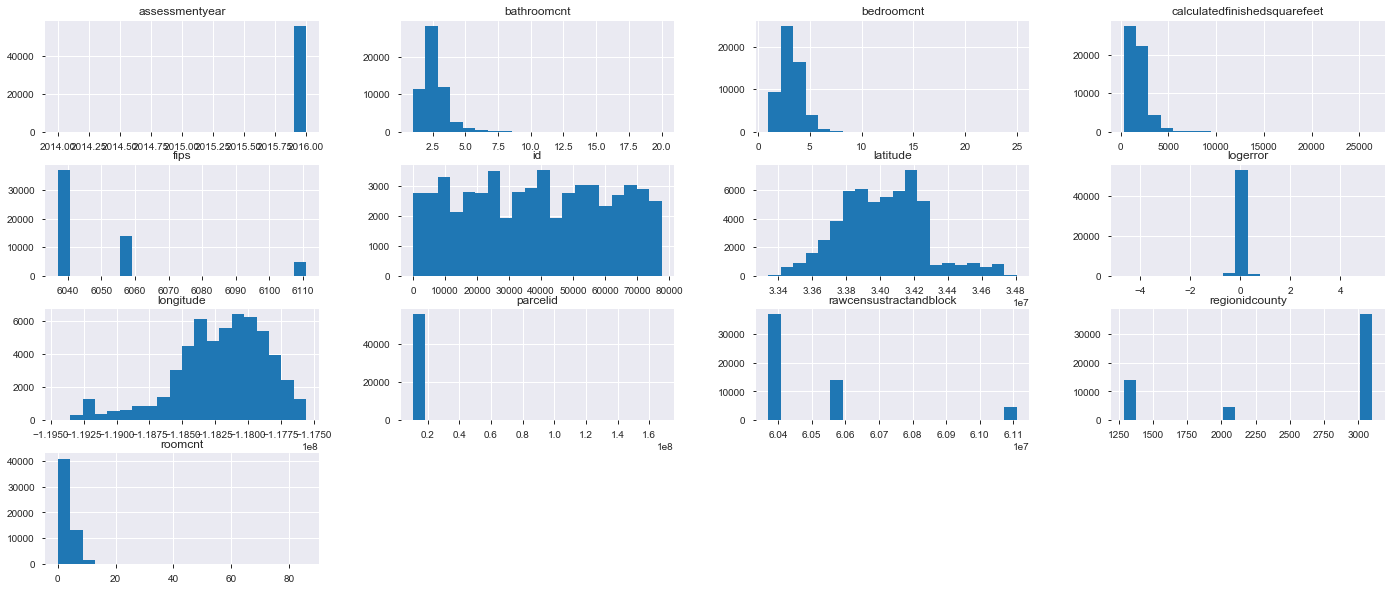

In [30]:
df.hist(figsize=(24, 10), bins=20)
plt.show()

Impute values for calculatedfinishedsquarefeet

In [32]:
sqfeet = df.calculatedfinishedsquarefeet.median()
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.fillna(sqfeet)

Check if any nulls remain

In [33]:
df.isnull().sum()

id                              0
parcelid                        0
logerror                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
rawcensustractandblock          0
regionidcounty                  0
roomcnt                         0
assessmentyear                  0
dtype: int64

## Mall data